Initial cost: 32.072733877455676
Min cost: 4.515955503078914


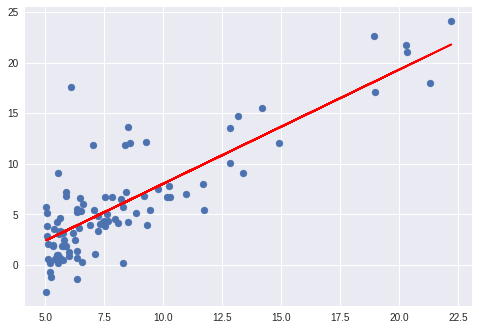

In [9]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'lin-reg-data.txt'
data = np.loadtxt(filename, delimiter= ',')

length = data.shape[1]
weight = data[:, 0:length-1]
height = np.array(data[:,length-1:])

# cost function
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

weight_mat = np.matrix(weight)
weight_ones = np.insert(weight, 0, values=1, axis = 1)

X = np.matrix(weight_ones)
y = np.matrix(height)
theta = np.matrix(np.array([0, 0]))

initial_cost = computeCost(X, y, theta)  
print('Initial cost:', initial_cost)

# gradient descent
def gradDes(theta, alpha, X, y, iter, weight_mat):
    
    theta0 = theta[0, 0]
    theta1 = theta[0, 1]
    m = len(y)

    for i in range(iter):
       
        theta0 = theta0 - alpha * np.sum((X * theta.T) - y) / m
        theta1 = theta1 - alpha * np.sum(((X * theta.T) - y).T * weight_mat) / m
        #print(weight_mat.T.shape)
        theta = np.matrix([theta0, theta1])
  
    return  (theta0, theta1)


thetas = gradDes(theta, 0.01, X, y, 1000, weight_mat)

theta_new =  np.matrix([thetas[0], thetas[1]] )
cost = computeCost(X, y, theta_new)
print('Min cost:', cost)

y1= thetas[1] * weight_mat + thetas[0] 

y_array = np.array(y)
y1_array = np.array(y1)
weight_array = np.array(weight)

# plotting prediction and original data
plt.scatter(weight, y_array)
plt.plot(weight, y1_array, color='r')
plt.show()
